## Presentation of event in the DAMIC100 data set
The data are stored at Lyon: /sps/hep/damic/gaior/data/20200415/afterpfs/<br>
They are converted in a pandas dataframe and saved under a pickle format.<br>



In [1]:
# import list
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import bokeh
#path def
datapath = '/Users/gaior/DAMIC/code/wimpsearch/data/exposed/datasel.pkl'
datapathnodll = '/Users/gaior/DAMIC/code/wimpsearch/data/exposed/dataselnodll.pkl'

pd.options.display.float_format = "{:.2f}".format
datadf = pd.read_pickle(datapath)
datadfnocut = pd.read_pickle(datapathnodll)
databasic = datadf[['ene1','sigma','centerx','centery','RUNID','EXTID','cid']]

In [2]:
print(datadf.columns)

Index(['image', 'ext', 'DC', 'RUNID', 'EXTID', 'EXPSTART', 'EXPTIME', 'efact',
       'nvalidpix', 'cid', 'centerx', 'centery', 'linlength', 'is_masked',
       'sadc', 'qguess', 'sguess', 'oguessg', 'oguessc', 'llg', 'llc',
       'success', 'status', 'll', 'll_enlarg', 'llc_enlarg', 'll_14', 'llc_14',
       'meanx', 'meanx_err', 'sigma', 'sigma_err', 'efit', 'qbase',
       'qbase_err', 'npix', 'npix1p6', 'npix2', 'npix2p5', 'npix4', 'gmeanx',
       'gmeanx_err', 'gsigma', 'gsigma_err', 'gbase', 'gbase_err', 'gnorm',
       'gnorm_err', 'gene', 'gchi2', 'gll', 'cbase', 'cbase_err', 'cchi2',
       'cll', 'ene1', 'ene_integ', 'prob', 'chi2g', 'chi2c', 'qmax',
       'qdelta_dx', 'qdelta_sx', 'touchmask', 'is_premasked', 'sime', 'simz',
       'simx', 'simy', 'simn', 'simdistx', 'simdisty', 'multirows', 'dll'],
      dtype='object')


In [3]:
databasic.describe()

,ene1,sigma,centerx,centery,RUNID,EXTID,cid
count,1152.00,1152.00,1152.00,1152.00,1152.00,1152.00,1152.00
mean,4.50,0.59,6379.22,21.97,3395.97,5.72,37.56
std,2.96,0.35,1159.23,12.08,509.58,3.93,54.07
min,0.05,0.01,4412.00,2.50,2474.00,1.00,1.00
25%,1.73,0.23,5371.25,11.50,2933.00,2.00,11.00
50%,4.22,0.65,6380.50,21.50,3476.00,4.00,22.00
75%,7.35,0.94,7428.50,33.50,3878.25,11.00,38.25
max,10.01,1.50,8245.00,41.50,4149.00,12.00,499.00


In [4]:
ecut = pd.cut(datadf['ene1'], bins=10)

Counts:

In [5]:
databasic['ene1'].groupby(ecut).count()

ene1
(0.0449, 1.05]    188
(1.05, 2.046]     147
(2.046, 3.042]    117
(3.042, 4.037]    102
(4.037, 5.033]     99
(5.033, 6.028]     76
(6.028, 7.024]    103
(7.024, 8.019]    115
(8.019, 9.015]    141
(9.015, 10.01]     64
Name: ene1, dtype: int64

In [6]:
databasic.groupby(ecut).mean()

,ene1,sigma,centerx,centery,RUNID,EXTID,cid
ene1,,,,,,,
"(0.0449, 1.05]",0.54,0.68,6511.76,21.31,3361.61,5.72,34.35
"(1.05, 2.046]",1.55,0.60,6235.36,22.40,3452.91,5.86,37.76
"(2.046, 3.042]",2.57,0.56,6318.75,22.26,3405.91,6.29,42.15
"(3.042, 4.037]",3.58,0.58,6384.65,22.61,3446.21,5.19,36.87
"(4.037, 5.033]",4.50,0.63,6373.56,22.17,3293.76,6.08,46.76
"(5.033, 6.028]",5.52,0.58,6489.52,22.26,3307.43,5.00,35.45
"(6.028, 7.024]",6.57,0.55,6270.35,21.83,3486.72,5.45,36.49
"(7.024, 8.019]",7.61,0.51,6353.36,22.73,3428.69,5.55,39.98
"(8.019, 9.015]",8.34,0.56,6478.70,21.02,3370.48,5.79,30.39


Energy plots:

various binning:<br>
1: 1kev<br>
2: 0.5 kev<br>
3: 0.1 kev

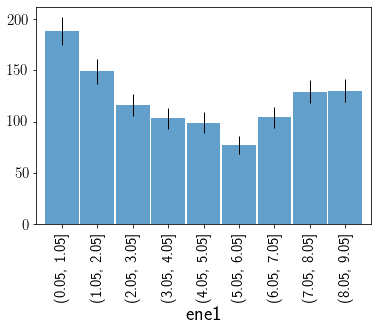

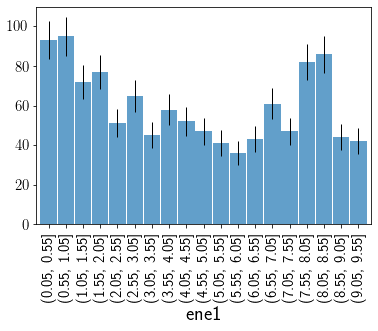

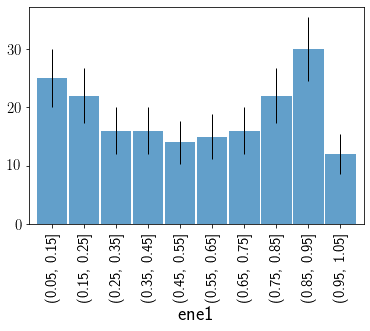

In [7]:
bin1 = np.arange(0.05,10,1)
bin2 = np.arange(0.05,10,0.5)
bin3 = np.arange(0.05,10,0.1)
data1 = databasic.groupby(pd.cut(datadf['ene1'], bins=bin1))
data2 = databasic.groupby(pd.cut(datadf['ene1'], bins=bin2))
data3 = databasic.groupby(pd.cut(datadf['ene1'], bins=bin3))

count1 = data1['ene1'].count()
count2 = data2['ene1'].count()
count3 = data3['ene1'].count()


plt.figure()
count1.plot.bar(yerr=count1**0.5,width=0.95,alpha=0.7)
plt.figure()
count2.plot.bar(yerr=count2**0.5,width=0.95,alpha=0.7)
plt.figure()
count3[:10].plot.bar(yerr=count3**0.5,width=0.95,alpha=0.7)


Text(0, 0.5, 'sigma [pixel]')

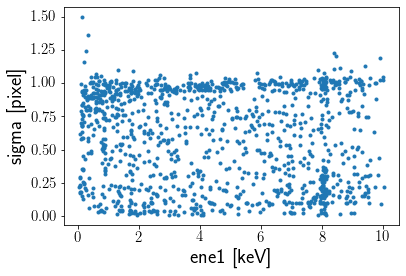

In [8]:
fig, ax = plt.subplots()
ax.plot(databasic.ene1,databasic.sigma,'.')
ax.set_xlabel('ene1 [keV]')
ax.set_ylabel('sigma [pixel]')

In [9]:
# ###### plot bokeh won't be working with the binder ######
# p = figure(plot_width=600, plot_height=400)
# p.circle(databasic.ene1,databasic.sigma, size=5, color="navy", alpha=0.5)
# show(p)

### Quick look at the four outliers at low E and large sigma

In [10]:
databasic.query('sigma > 1.1 & ene1 < 1')

,ene1,sigma,centerx,centery,RUNID,EXTID,cid
775,0.26,1.25,6666.00,35.50,2573.00,11.00,78.00
1267,0.19,1.16,7226.00,28.50,2833.00,4.00,30.00
42238,0.33,1.37,6962.00,8.50,3666.00,11.00,6.00
46432,0.13,1.50,8107.00,40.50,3867.00,12.00,41.00


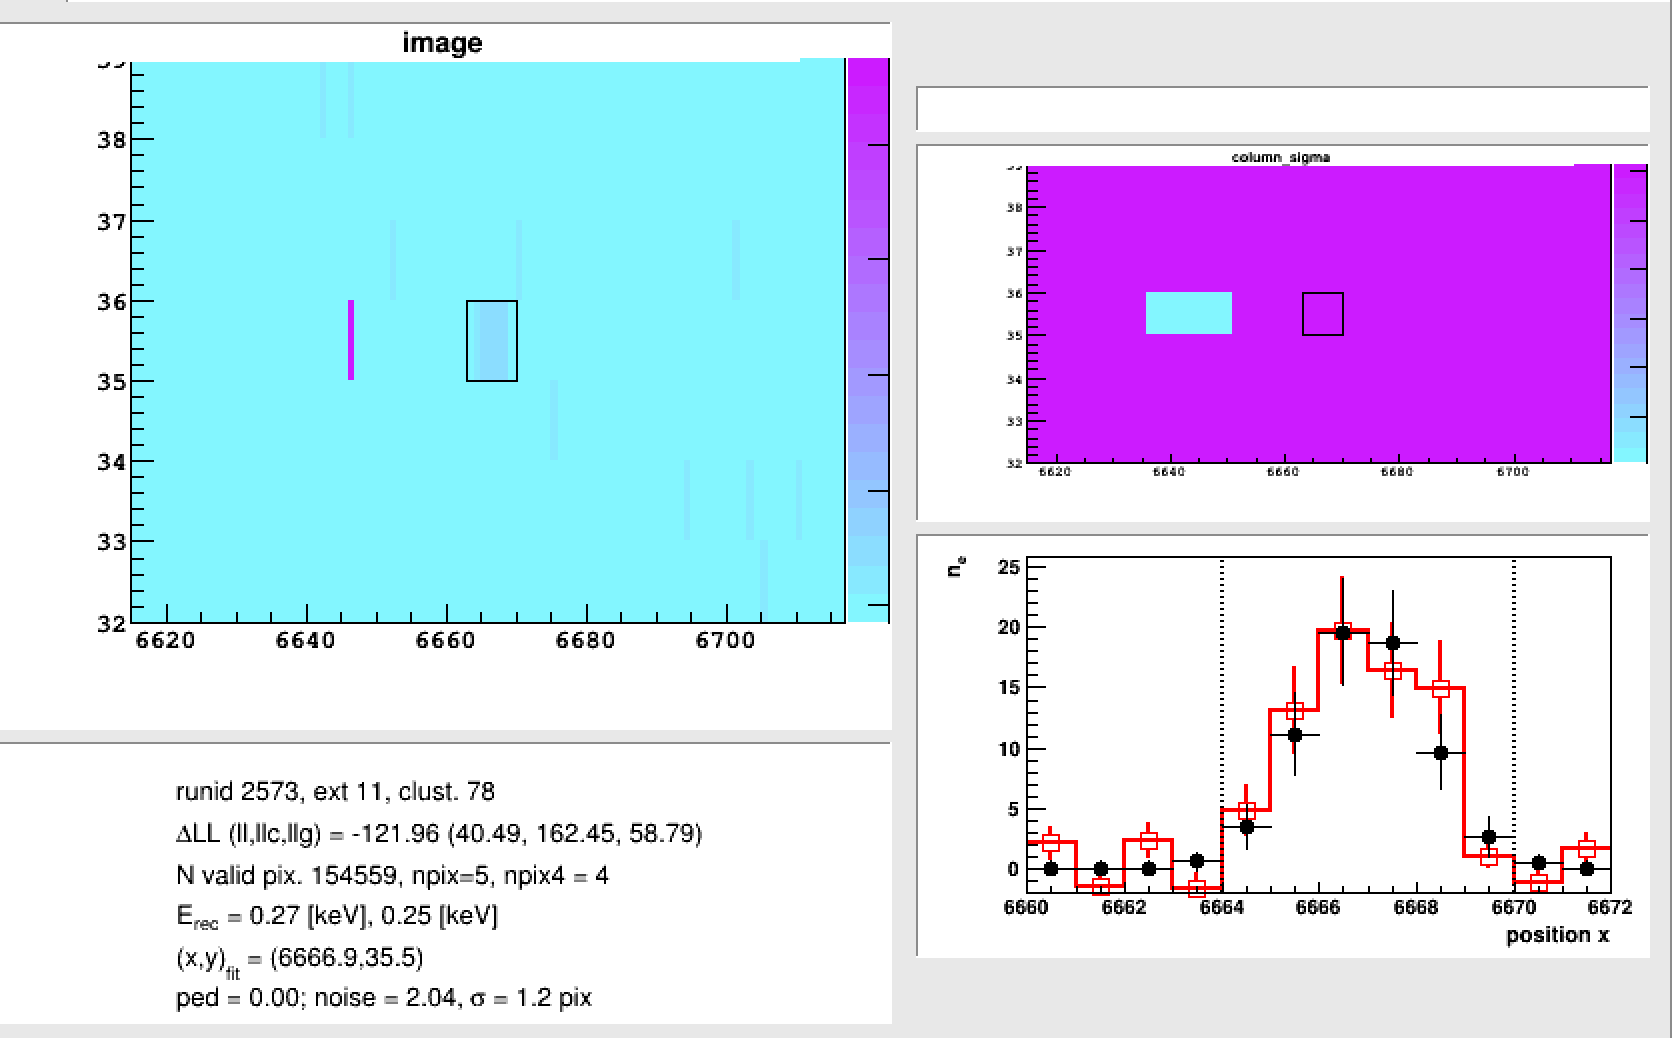

In [11]:
from IPython.display import Image
Image(filename='./images/2573_11.png')

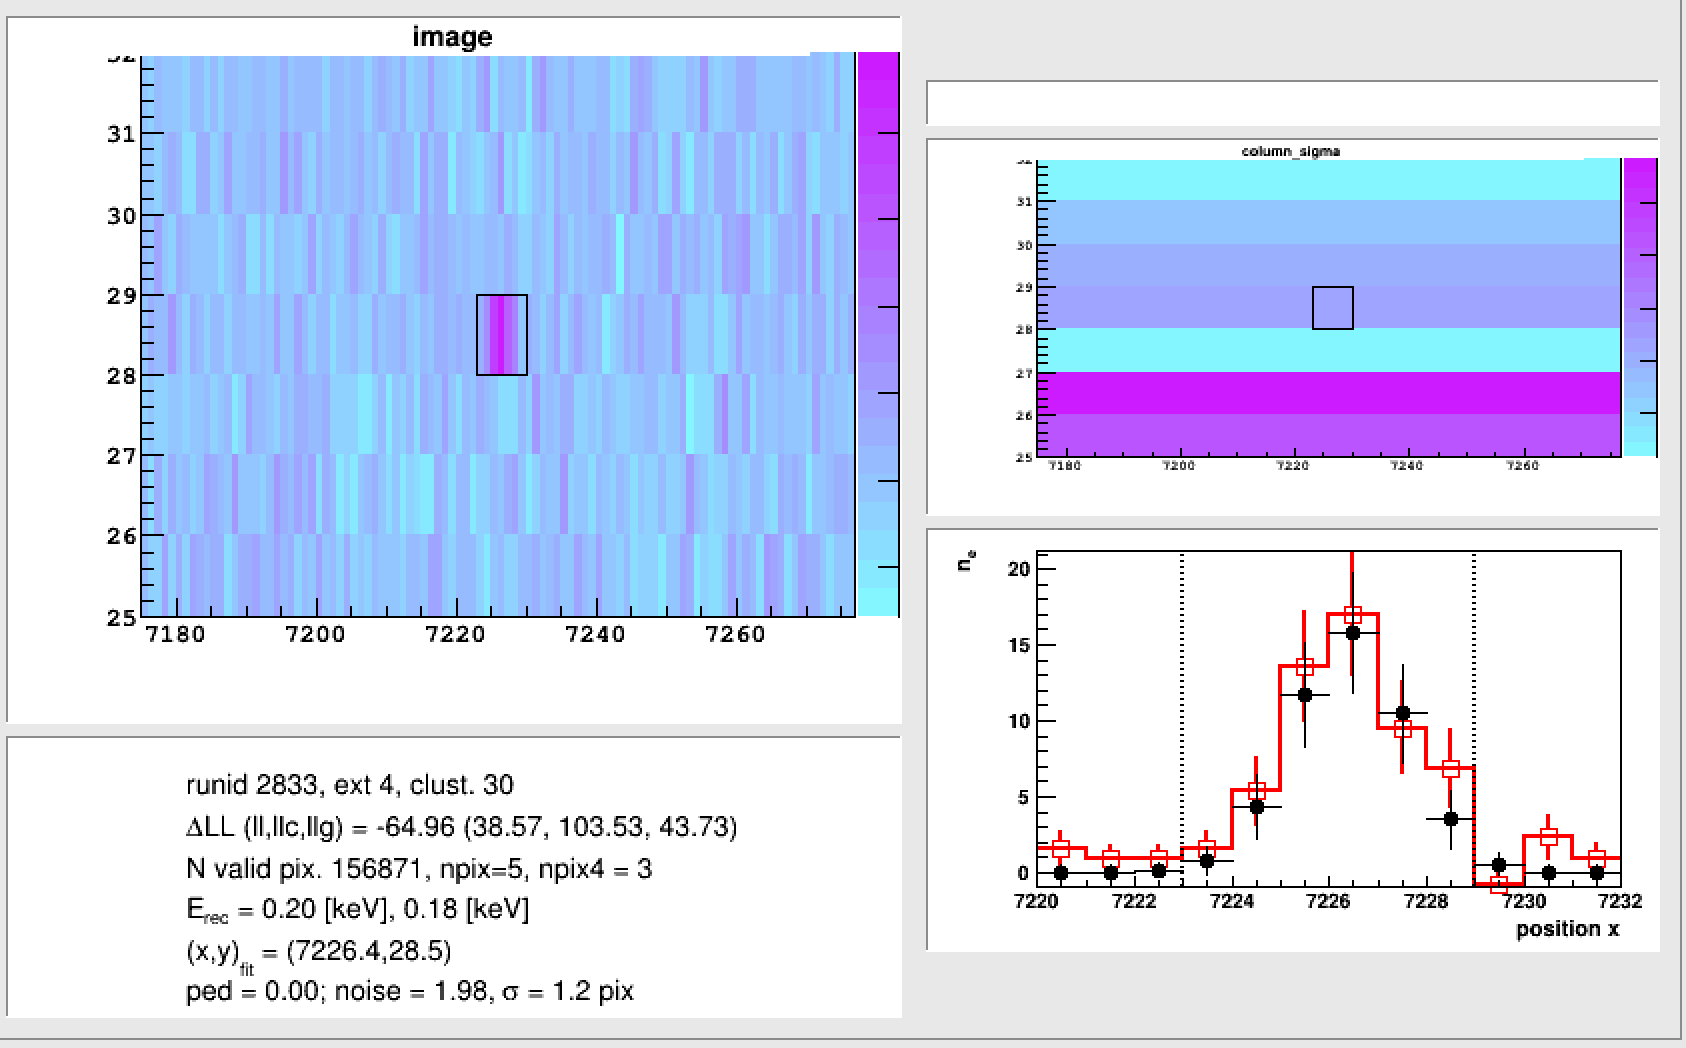

In [12]:
Image(filename='./images/2833_4.png')

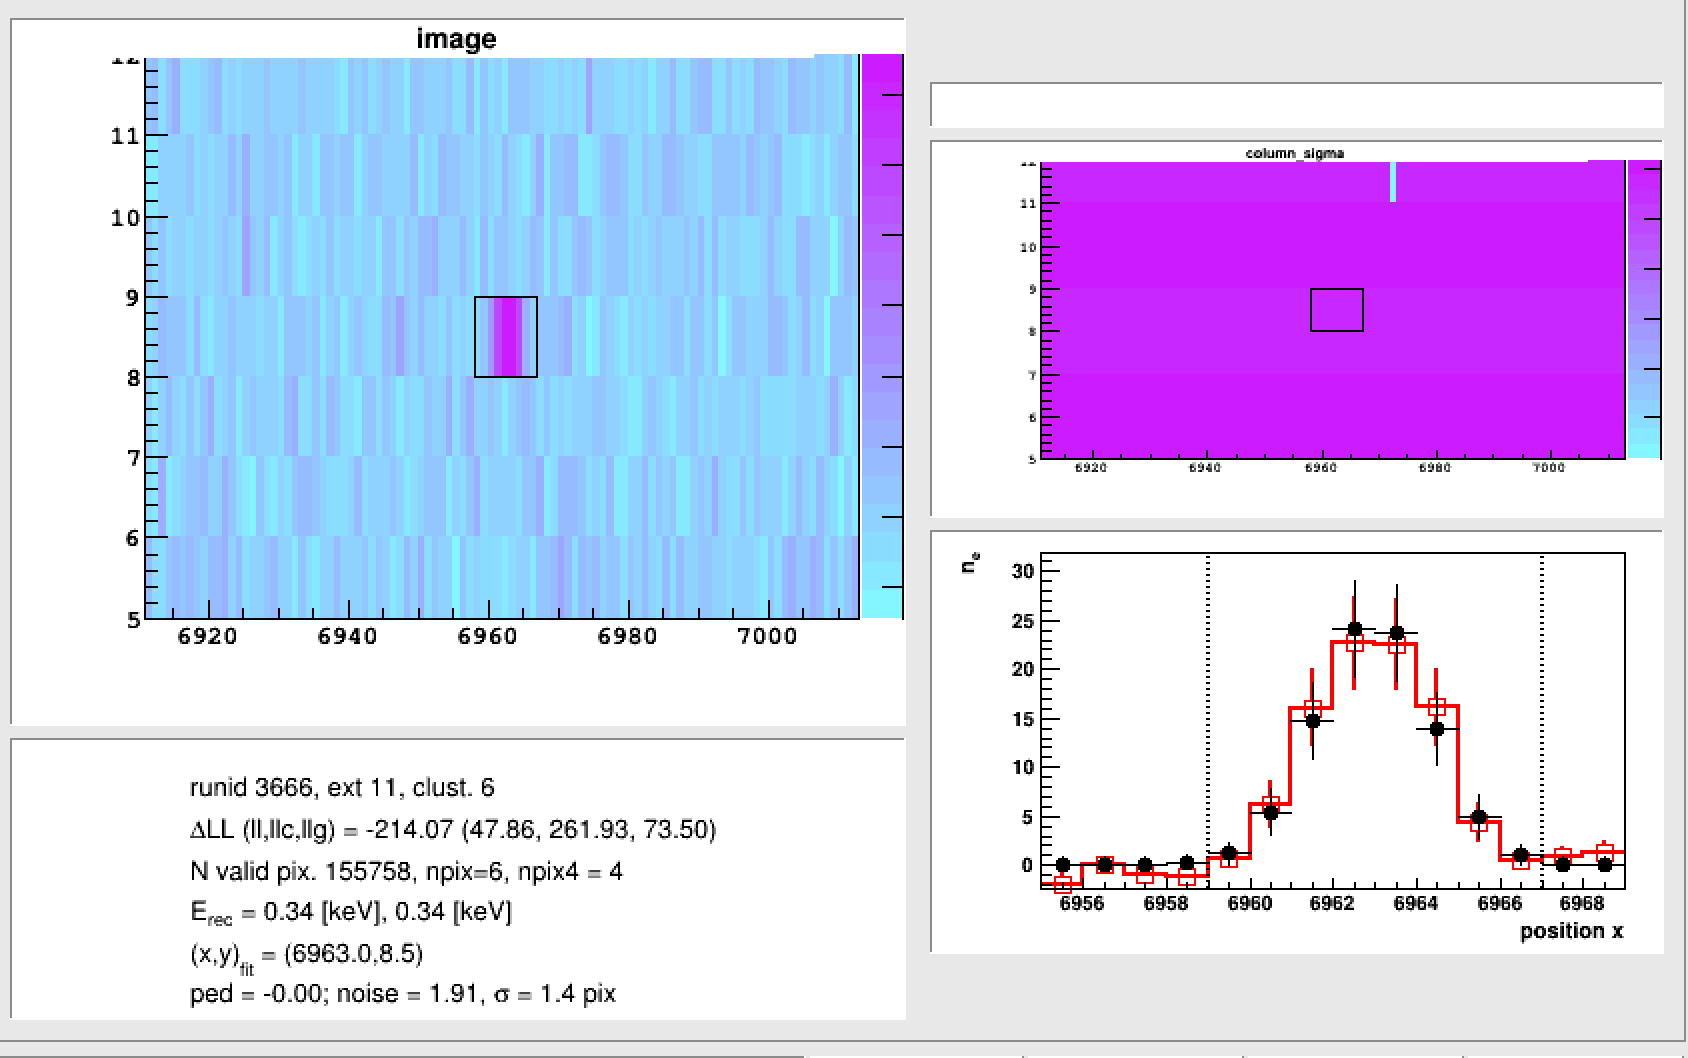

In [13]:
Image(filename='./images/3666_6.png')

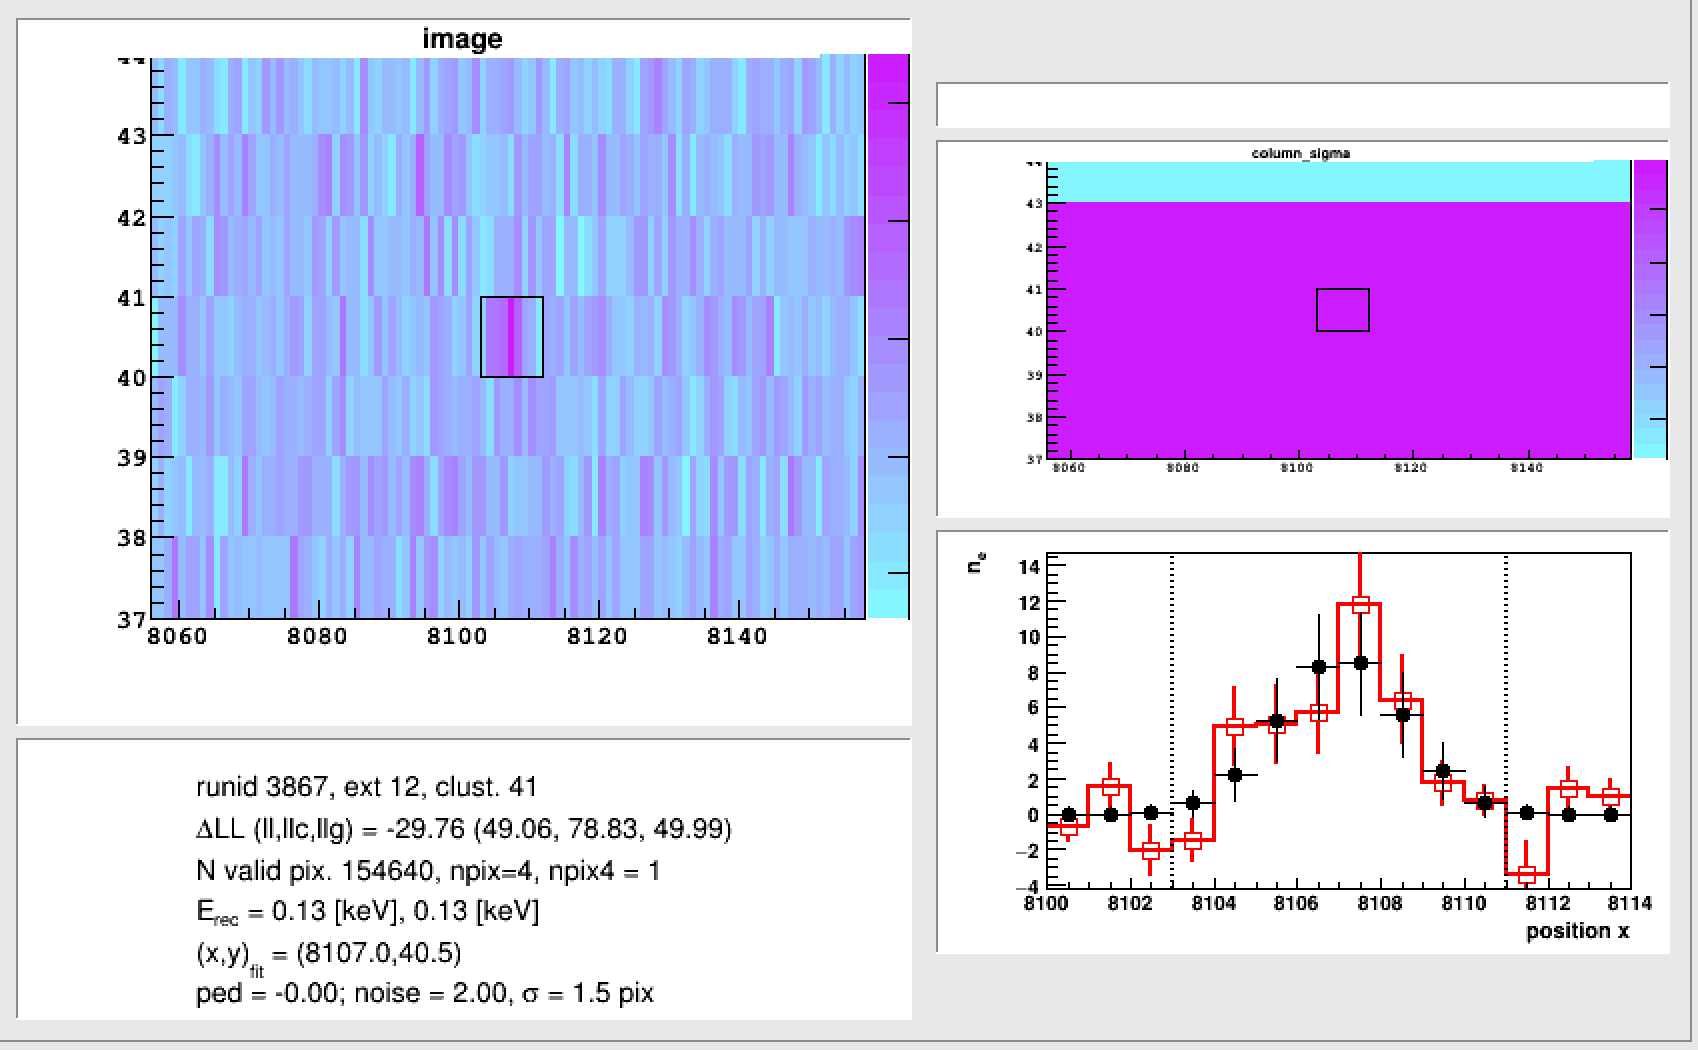

In [14]:
Image(filename='./images/3867_12.png')

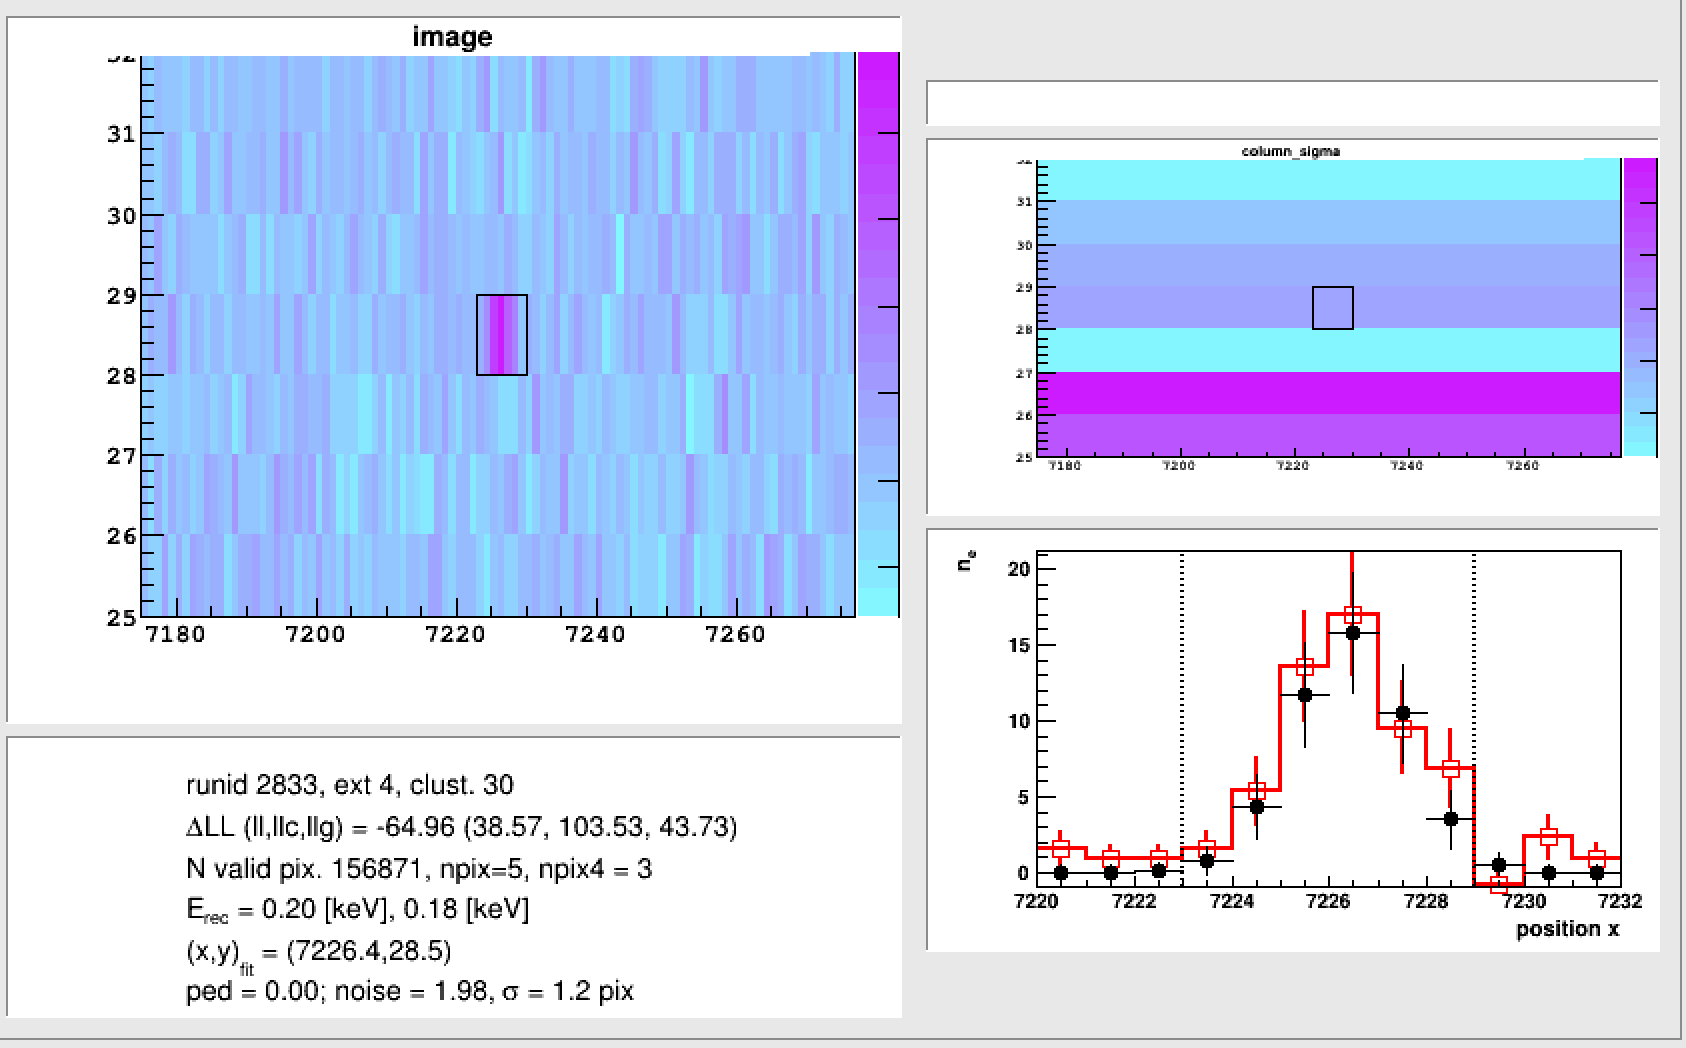

In [15]:
databasic.groupby(['EXTID']).mean()

,ene1,sigma,centerx,centery,RUNID,cid
EXTID,,,,,,
1.00,4.59,0.55,6404.08,20.18,3393.58,45.07
2.00,5.03,0.51,6343.52,23.01,3360.44,33.33
3.00,4.22,0.60,6497.19,21.02,3367.41,25.99
4.00,4.13,0.59,6369.35,21.00,3415.81,41.21
6.00,4.37,0.58,6386.21,23.38,3312.95,53.45
11.00,4.39,0.65,6426.87,21.26,3446.28,38.91
12.00,4.72,0.66,6251.73,22.72,3493.80,24.77


In [16]:
databasic.groupby(['EXTID']).count()['ene1']

EXTID
1.00      98
2.00     212
3.00     147
4.00     177
6.00     188
11.00    173
12.00    157
Name: ene1, dtype: int64

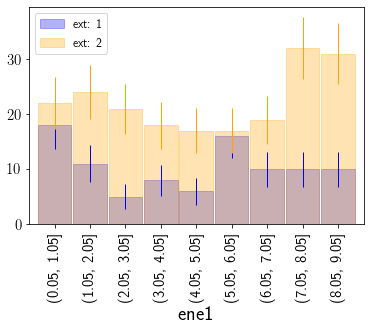

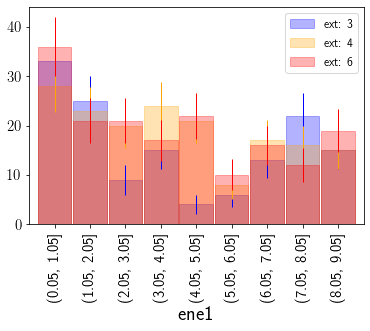

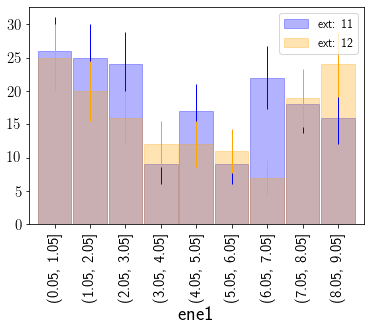

In [17]:
bin1 = np.arange(0.05,10,1)
#exts = [1,2,3,4,6,11,12]
exts = [1,2]
cols = ['blue','orange','red','black','green','grey','purple']
fig =plt.figure()
for ext,col in zip(exts,cols):
    dftemp = databasic.query('EXTID == '+str(ext))
    data = dftemp.groupby(pd.cut(dftemp['ene1'], bins=bin1))
    count = data['ene1'].count()
    count.plot.bar(yerr=count**0.5,width=0.95,facecolor=col,edgecolor=col,ecolor=col,alpha=0.3,label='ext: ' + str(ext))
    plt.legend()

fig =plt.figure()
exts = [3,4,6]
cols = ['blue','orange','red','black','green','grey','purple']
for ext,col in zip(exts,cols):
    dftemp = databasic.query('EXTID == '+str(ext))
    data = dftemp.groupby(pd.cut(dftemp['ene1'], bins=bin1))
    count = data['ene1'].count()
    count.plot.bar(yerr=count**0.5,width=0.95,facecolor=col,edgecolor=col,ecolor=col,alpha=0.3,label='ext: ' + str(ext))
    plt.legend()
fig =plt.figure()
exts = [11,12]
cols = ['blue','orange','red','black','green','grey','purple']
for ext,col in zip(exts,cols):
    dftemp = databasic.query('EXTID == '+str(ext))
    data = dftemp.groupby(pd.cut(dftemp['ene1'], bins=bin1))
    count = data['ene1'].count()
    count.plot.bar(yerr=count**0.5,width=0.95,facecolor=col,edgecolor=col,ecolor=col,alpha=0.3,label='ext: ' + str(ext))
    plt.legend()


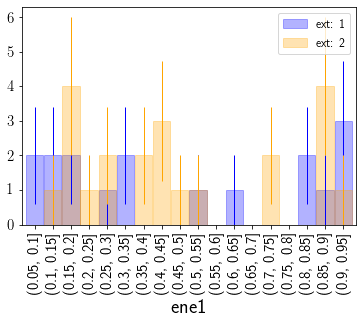

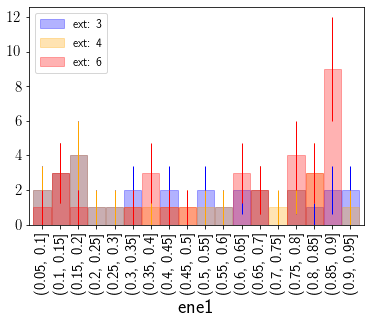

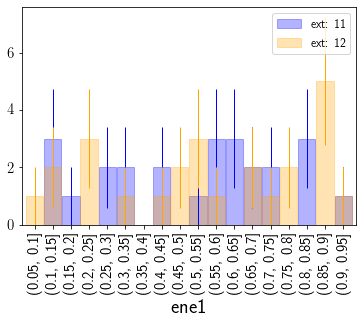

In [18]:
bin1 = np.arange(0.05,1,0.05)
exts = [1,2]
cols = ['blue','orange','red','black','green','grey','purple']
fig =plt.figure()
for ext,col in zip(exts,cols):
    dftemp = databasic.query('EXTID == '+str(ext))
    data = dftemp.groupby(pd.cut(dftemp['ene1'], bins=bin1))
    count = data['ene1'].count()
    count.plot.bar(yerr=count**0.5,width=0.95,facecolor=col,edgecolor=col,ecolor=col,alpha=0.3,label='ext: ' + str(ext))
    plt.legend()

fig =plt.figure()
exts = [3,4,6]
cols = ['blue','orange','red','black','green','grey','purple']
for ext,col in zip(exts,cols):
    dftemp = databasic.query('EXTID == '+str(ext))
    data = dftemp.groupby(pd.cut(dftemp['ene1'], bins=bin1))
    count = data['ene1'].count()
    count.plot.bar(yerr=count**0.5,width=0.95,facecolor=col,edgecolor=col,ecolor=col,alpha=0.3,label='ext: ' + str(ext))
    plt.legend()
fig =plt.figure()
exts = [11,12]
cols = ['blue','orange','red','black','green','grey','purple']
for ext,col in zip(exts,cols):
    dftemp = databasic.query('EXTID == '+str(ext))
    data = dftemp.groupby(pd.cut(dftemp['ene1'], bins=bin1))
    count = data['ene1'].count()
    count.plot.bar(yerr=count**0.5,width=0.95,facecolor=col,edgecolor=col,ecolor=col,alpha=0.3,label='ext: ' + str(ext))
    plt.legend()


### extension study

### computation of the exposure for each extension

In [109]:
datadfdccut = datadfnocut.query('DC < 6.8')
a = datadfdccut.groupby(['EXTID','RUNID'])
print(datadfnocut.shape[0])

52496


In [110]:
size = len(a)
print(size)

4960


In [112]:
exp1 = 0
exp2 = 0
exp3 = 0
exp4 = 0
exp6 = 0
exp11 = 0
exp12 = 0

for name, group in a:
    exposure = float(np.unique(group.EXPTIME)[0])
    if name[0] == 1:
        exp1 += exposure
    if name[0] == 2:
        exp2 += exposure
    if name[0] == 3:
        exp3 += exposure
    if name[0] == 4:
        exp4 += exposure
    if name[0] == 6:
        exp6 += exposure
    if name[0] == 11:
        exp11 += exposure
    if name[0] == 12:
        exp12 += exposure

print(exp1,exp2,exp3,exp4,exp6,exp11,exp12)
a_exp = np.array([exp1,exp2,exp3,exp4,exp6,exp11,exp12])

23892677.0 22234285.0 24858167.0 25591930.0 25501440.0 23330218.0 18314375.0


In [128]:
normedrate = np.asarray(databasic.groupby(['EXTID']).count()['ene1'],dtype=float)/a_exp

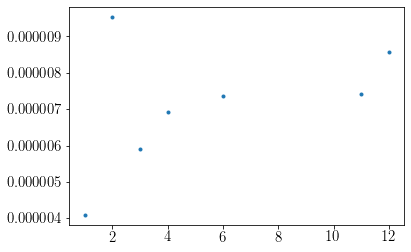

In [131]:
exts = [1,2,3,4,6,11,12]
plt.plot(exts,normedrate,'.')